---
author: "Sacha Lancman"
---

# Bella Beat Analysis

## Preparation and Cleaning

### Installing and loading the packages


In [ ]:
install.packages("lubridate")
library(lubridate)

install.packages("tidyverse")
library(tidyverse)

### Loading the data:

After taking a look at all the tables in the dataset, here are the
tables that I will need to perform my analysis. I did not keep the
minutes and seconds tables (except for heartrate_seconds_merged) because
it will not be interesting to have that level of precision in time. We
already have the same data hourly and daily.

In [ ]:
dailyActivity_merged <- read_csv("dailyActivity_merged.csv")
View(dailyActivity_merged)

hourlyCalories_merged <- read_csv("hourlyCalories_merged.csv")
View(hourlyCalories_merged)

hourlyIntensities_merged <- read_csv("hourlyIntensities_merged.csv")
View(hourlyIntensities_merged)

hourlySteps_merged <- read_csv("hourlySteps_merged.csv")
View(hourlySteps_merged)

sleepDay_merged <- read_csv("sleepDay_merged.csv")
View(sleepDay_merged)

weightLogInfo_merged <- read_csv("weightLogInfo_merged.csv")
View(sleepDay_merged)

With the way the data has been imported (files tab, import data set), I
can see details such as the data type for each columns, the number of
rows and columns, and the column names.


### transform the data

After joining all the data, I will have 2 tables.

The daily table (dailyActivity_merged + sleepDay_merged +
weightLogInfo_merged) and the hourly table (hourlyCalories_merged +
hourlyIntensities_merged + hourlySteps_merged) 

I chose an inner join for the hourly tables because they all have the same number of rows, 22099.

In [ ]:
hourly_p2 <- hourlyCalories_merged %>% inner_join(hourlyIntensities_merged, by = c('Id','ActivityHour'))

hourly_table <- hourly_p2 %>% inner_join(hourlySteps_merged, by = c('Id', 'ActivityHour'))

To join (dailyActivity_merged + sleepDay_merged + weightLogInfo_merged),
I need them to have the same date columns. One column only has mdy dates
and the other have mdy + hms dates. After checking the type of data,
they are all chr, I know I can use the separate function and divide them
thanks to the space in between mdy and hms.

In [ ]:
class(weightLogInfo_merged$Date)
class(dailyActivity_merged$ActivityDate)
class(sleepDay_merged$SleepDay)

new_weight <- weightLogInfo_merged %>% separate(Date, c("ActivityDate", "col2"), " ")
new_sleep <- sleepDay_merged %>% separate(SleepDay, c("ActivityDate", "col2"), " ")

Dropping columns I won't use

In [ ]:
new_weight_2 <- new_weight[,-c(3,6,9)]

new_sleep_3 <- new_sleep[,-c(3,4)]

new_daily <- dailyActivity_merged[,-c(5,6,10)]

Joining daily tables. Unlike the hourly tables, the daily tables do not
have the same amount of rows(940, 413 and 67). I will use a left join,
and it will give a large amount of NULL values on the columns that are
added.

In [ ]:
new_daily_2 <- new_daily %>% left_join(new_sleep_3, by=c('Id','ActivityDate'))

daily_table <- new_daily_2 %>% left_join(new_weight_2, by=c('Id','ActivityDate'))

The dates come back as chr, we need to convert them to date:

In [ ]:
daily_table$ActivityDate <- mdy(daily_table$ActivityDate)
class(daily_table$ActivityDate)

adding columns (time to fall asleep and weekdays):

In [ ]:
daily_table$time_to_fall_alseep <- (daily_table$TotalTimeInBed - daily_table$TotalMinutesAsleep)

daily_table$weekday <- wday(daily_table$ActivityDate)

Looking at the tables. Checking the data types:

In [ ]:
str(daily_table)
str(hourly_table)

summarise(daily_table)
summarise(hourly_table)

daily_table %>% summary()
hourly_table %>% summary()

Looking at how many distinct id I have in both of my tables:

In [ ]:
n_distinct(daily_table$Id)
n_distinct(hourly_table$Id)

### Tableau analysis

I will conduct a tableau analysis on both of the tables:

#### daily table observations

It seems obvious that there is a positive correlation between the total steps
and the total distance but it is always good to check.


![Alt text](../../steps%20x%20distance.png.jpg)



It is similar with with the Weight and the BMI, but I believe that the BMI, 
even if not perfect, is still better to use in this situation because it takes
in consideration the height of the person.

 ![Alt text](https://file%2B.vscode-resource.vscode-cdn.net/c%3A/Users/lancm/OneDrive/Documents/google_data/trips/bella/BMI%20x%20Weight.jpg?version%3D1676512159082)

This chart confirms what I thought, calories and weight have a positive correlation,
whereas calories and BMI don't. 

![Alt text](../cal%20x%20wei%20x%20bmi.jpg)


Looking a the sleep time x total distance, I believed that the more sleep, the more 
distance. But after looking at the data, the scatter plot shows us no correlation.
The trend line, on the other hand, tells us there is a negative correlation.
My guess is that people sleep more on the days they don't work, thus the more they 
sleep, the less active they are.

![Alt text](../minute%20asleep%20x%20total%20distance.jpg)

There is also a positive correlation between the total distance and the calories,
which is normal, the more people are active, the more they need calories.

![Alt text](../distance%20x%20cal.jpg)




I also wanted to see if there were any differences between the difference days of the week:

The sedentary minutes are obviously the highest no matter what, because it accounts for the sleep time as well. The surprise is the very active minutes that is always higher than the fairly active one. Overall, no real differences between the days.

![intensity x day x min.png](attachment:intensity x day x min.png)

It is the same with this chart, comparing the Calories and Distance grouped by the days of the week again. No real diference, not matter what day we look at.

![Dis x cal x day.png](attachment:Dis x cal x day.png)
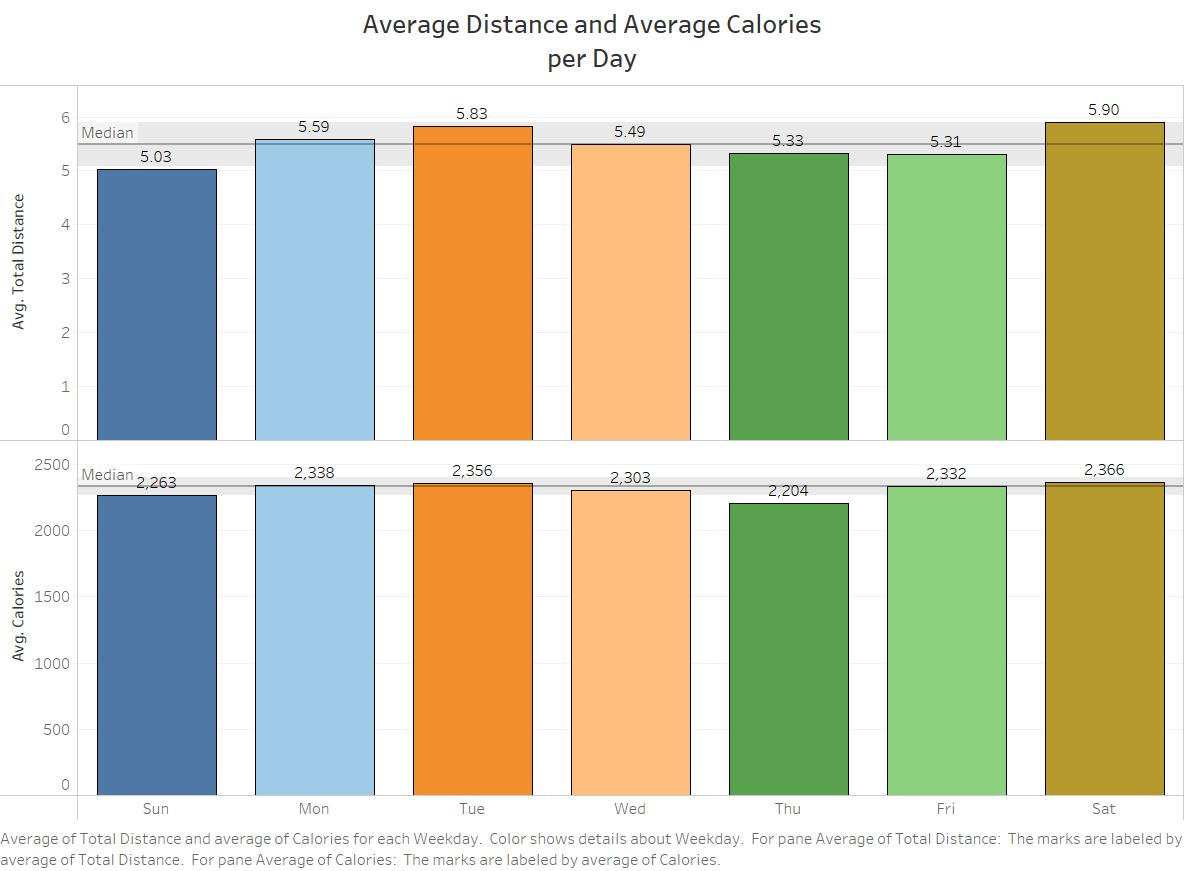
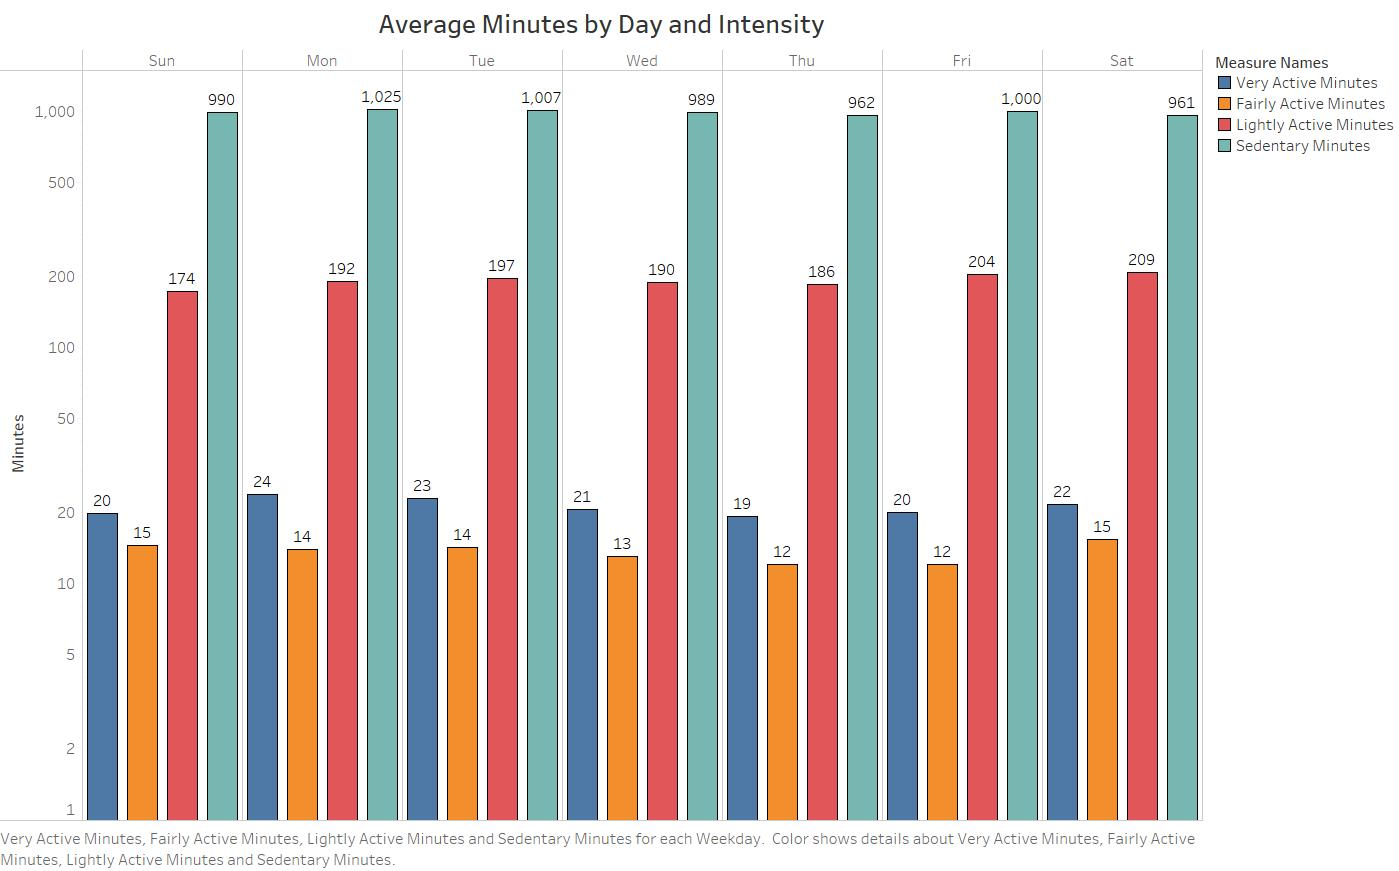

#### Hourly table observations:

The hourly table had a many more rows, which made the results smoothers, but had other limitations, it only had 4 interesting columns.
Here are the results and the graph:

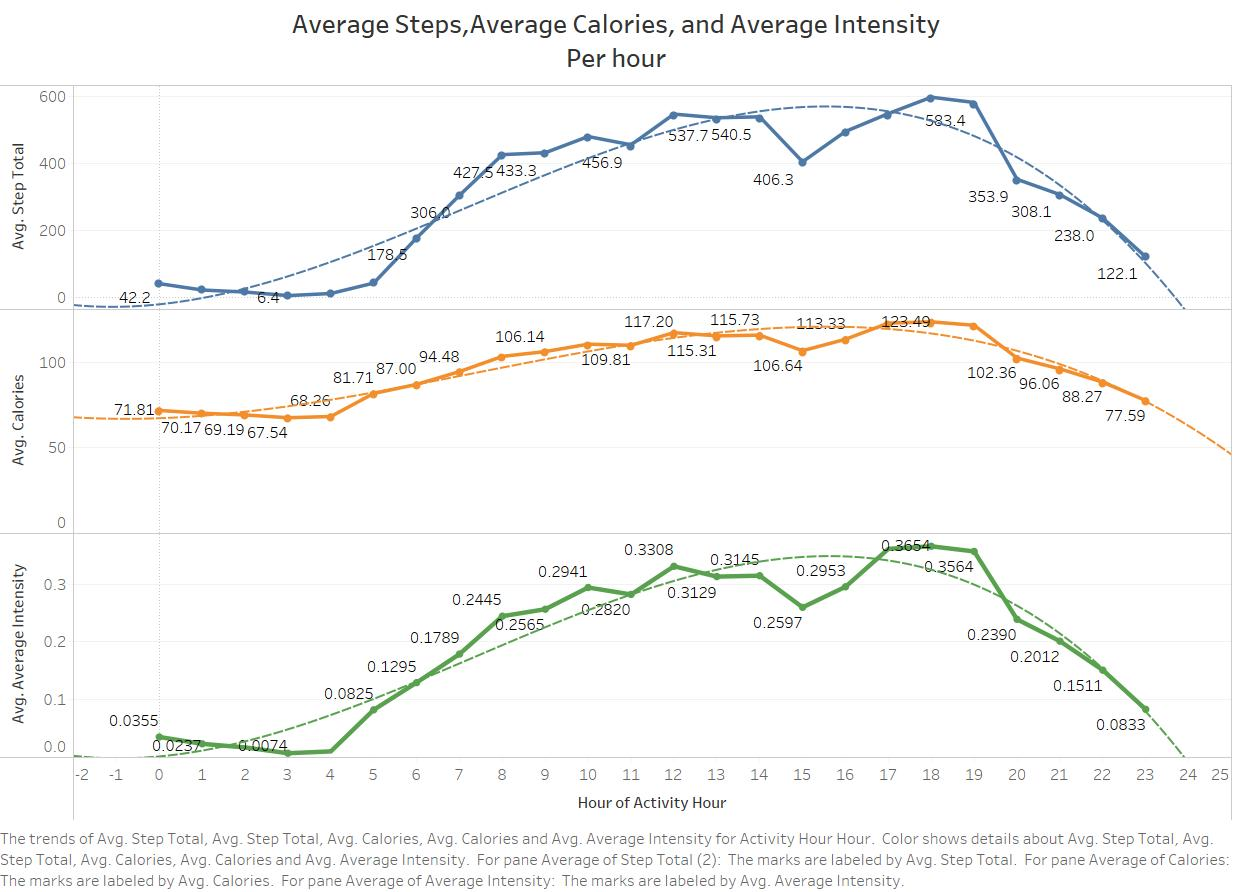

When you will see the most calories, intensities and total steps is betwee 6am and 10pm, which again is logical since this is when people are awake. Important to note that the calories have a lot less volatility. You can see the steps go x50 depending on the hour whereas the max calories isn't even twice as big as the min calories.

